In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

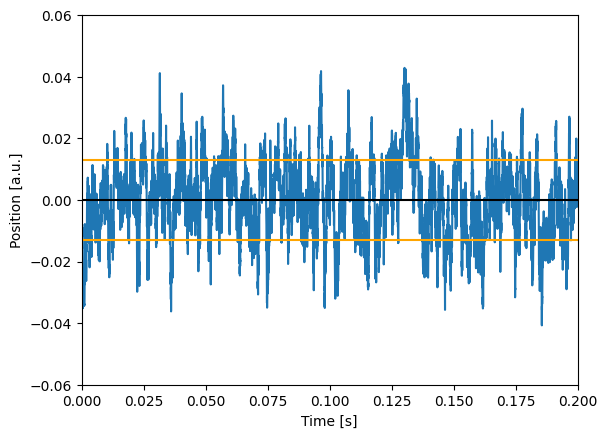

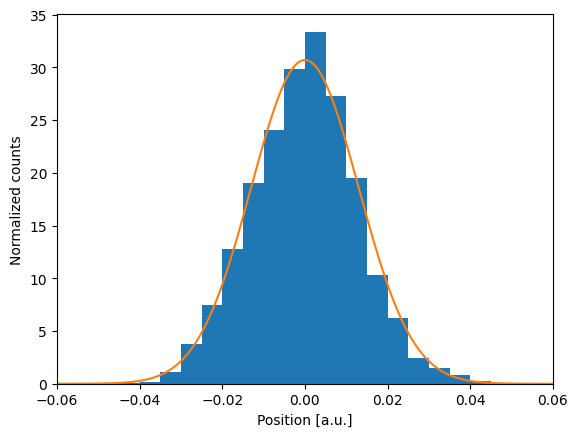

In [2]:
D = 4/(6*np.pi)
fc=200
fsample = 50000
Dt = 1/fsample
c=np.exp(-2*np.pi*fc*Dt)
Dx=np.sqrt((1-c**2)*D/(2*np.pi*fc))
N = 10000
stddev = np.sqrt(D/(2*np.pi*fc))
x = np.zeros(N)
for j in range(1,N):
  x[j]=c*x[j-1]+Dx*np.random.normal()
t_axis = Dt*np.arange(start=1,stop=N+1)
plt.plot(t_axis,x)
plt.plot([t_axis[0],t_axis[-1]],[0,0],color='black')
plt.plot([t_axis[0],t_axis[-1]],[stddev,stddev],color='orange')
plt.plot([t_axis[0],t_axis[-1]],[-stddev,-stddev],color='orange')
plt.xlim(0,t_axis[-1])
plt.ylim(-0.06,0.06)
plt.ylabel('Position [a.u.]')
plt.xlabel('Time [s]')
plt.show()
plt.hist(x,bins=np.arange(start=-0.05,stop=0.055,step=0.005),density=True)
x = np.linspace(- 5*stddev, 5*stddev, 300)
plt.plot(x, stats.norm.pdf(x, 0, stddev))
plt.xlim(-0.06,0.06)
plt.xlabel('Position [a.u.]')
plt.ylabel('Normalized counts')
plt.show()

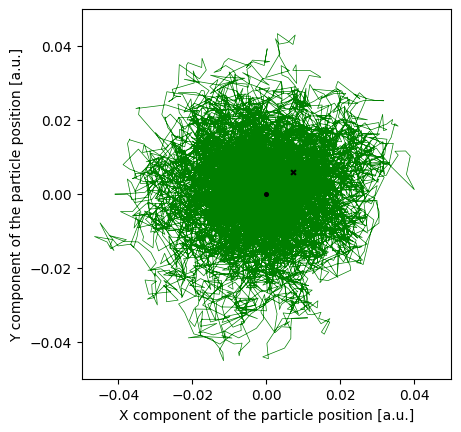

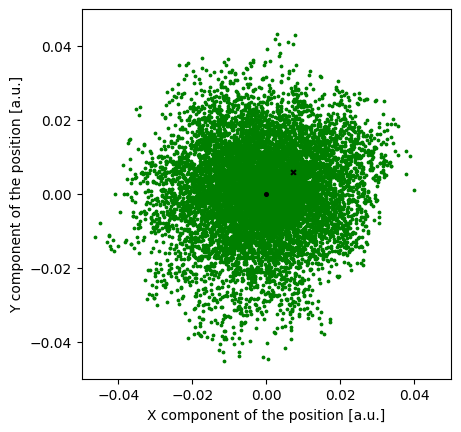

In [3]:
D=4/(6*np.pi)
fc=200
fsample=50000
Dt=1/fsample
c=np.exp(-2*np.pi*fc*Dt)
Dx=np.sqrt((1-c**2)*D/(2*np.pi*fc))
N=10000
x=np.zeros((N,1))
y=np.zeros((N,1))
for j in range(1,N):
  x[j]=c*x[j-1]+Dx*np.random.normal()
  y[j]=c*y[j-1]+Dx*np.random.normal()


fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.ylim(-0.05,0.05)
plt.xlim(-0.05,0.05)
plt.plot(x[1:-2],y[1:-2],linewidth=0.5,zorder=0,c='green')
plt.scatter(x[0],y[0],s=7,c='black',marker='o',zorder=1)
plt.scatter(x[-1],y[-1],s=12,c='black',marker='x',zorder=2)
plt.xlabel('X component of the particle position [a.u.]')
plt.ylabel('Y component of the particle position [a.u.]')
plt.show()
fig, ax = plt.subplots()
plt.scatter(x,y,s=3,c='green')
plt.scatter(x[0],y[0],s=7,c='black',marker='o')
plt.scatter(x[-1],y[-1],s=12,c='black',marker='x')
ax.set_aspect('equal', 'box')
plt.ylim(-0.05,0.05)
plt.xlim(-0.05,0.05)
plt.xlabel('X component of the position [a.u.]')
plt.ylabel('Y component of the position [a.u.]')
plt.show()

3 - 3d trap

In [4]:
D=4/(6*np.pi)
fc=200
fsample=5e4
Dt=1/fsample
c=np.exp(-2*np.pi*fc*D)
Dx=np.sqrt((1-c**2)*D/(2*np.pi*fc))
N=50000
x=np.zeros((N,1))
y=np.zeros((N,1))
for j in range(1,N):
  x[j]=c*x[j-1]+Dx*np.random.normal()
  y[j]=c*y[j-1]+Dx*np.random.normal()

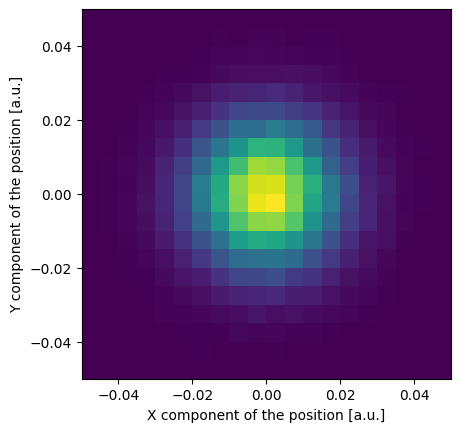

In [5]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.ylim(-0.05,0.05)
plt.xlim(-0.05,0.05)
plt.hist2d(x[:,0],y[:,0], bins = np.arange(start=-0.05,stop=0.055,step=0.005))
plt.xlabel('X component of the position [a.u.]')
plt.ylabel('Y component of the position [a.u.]')
plt.show()


here a 3d line plot:

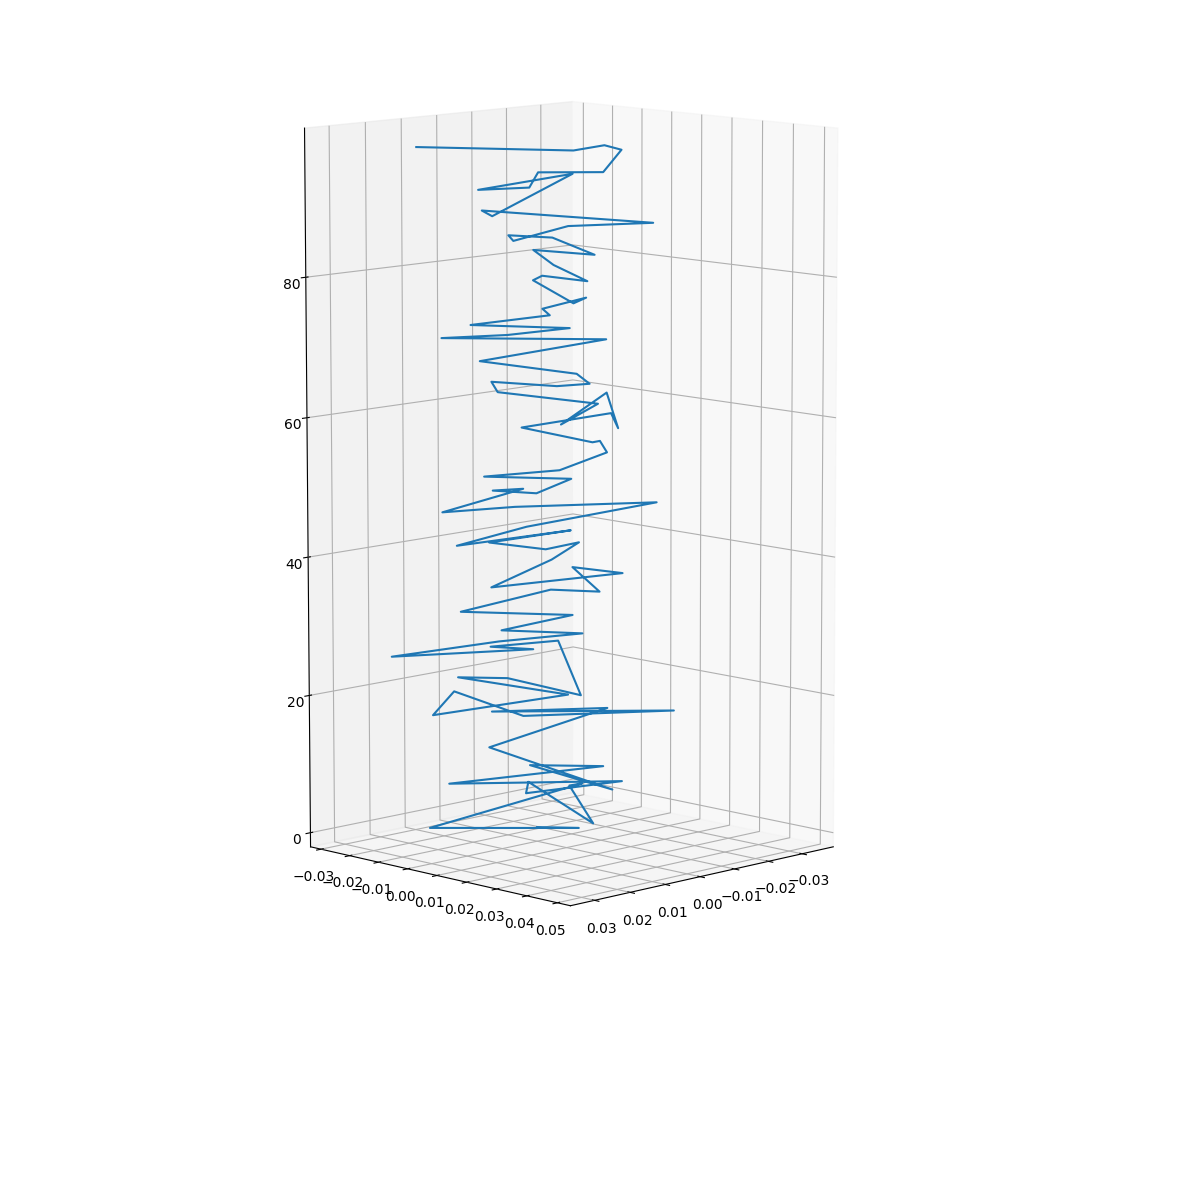

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 45)
#ax.set_xticks(np.linspace(-0.02, 0.02, 5))
#ax.set_yticks(np.linspace(-0.02, 0.02, 5))
#plt.xlim(-0.008,0.008)
#plt.ylim(-0.008,0.0079)
ax.plot3D(x[0:100,0],y[0:100,0],np.arange(100))
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.5, 0.5, 1.3, 1]))
plt.show()

4 - vanishing trapping force -- MAKE ALL START AT (0,0)

In [7]:
D = 4/(6*np.pi)
fsample = 50000
Dt=1/fsample
Dx = np.sqrt(2*D*Dt)
N=10000
x = Dx*np.random.normal(size=(N,1))
x[0]=0
y = Dx*np.random.normal(size=(N,1))
y[0]=0
x1 = np.cumsum(x)
y1 = np.cumsum(y)
x = Dx*np.random.normal(size=(N,1))
x[0]=0
y = Dx*np.random.normal(size=(N,1))
y[0]=0
x2 = np.cumsum(x)
y2 = np.cumsum(y)
x = Dx*np.random.normal(size=(N,1))
x[0]=0
y = Dx*np.random.normal(size=(N,1))
y[0]=0
x3 = np.cumsum(x)
y3 = np.cumsum(y)

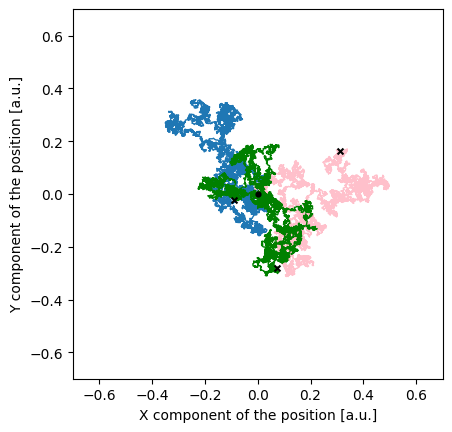

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.plot(x1,y1,zorder=0,linewidth=1)
plt.plot(x3,y3,zorder=0,color = 'pink',linewidth=1)
plt.plot(x2,y2,zorder=0,color = 'green',linewidth=1)
plt.scatter(x1[0],y1[0],color='black',marker='o',s=12,zorder=0)
plt.scatter([x1[-1],x2[-1],x3[-1]],[y1[-1],y2[-1],y3[-1]],color='black',marker='x',s=18,zorder=0)
plt.xlabel('X component of the position [a.u.]')
plt.ylabel('Y component of the position [a.u.]')
plt.xlim(-0.7,0.7)
plt.ylim(-0.7,0.7)
plt.show()

5 - periodogram

(10000, 64)
(64,)


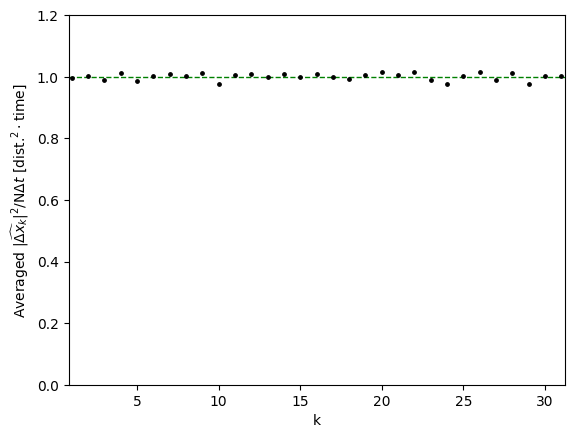

In [18]:
M=10000
N = 2**6
Dx = np.random.normal(size=(M,N))
FTDx = np.fft.fft(Dx)
#print(np.shape(FTDx))
Pxx = (np.absolute(FTDx)**2)/N
print(np.shape(Pxx))
avPxx = np.mean(Pxx,axis = 0)
print(np.shape(avPxx))
plt.scatter(np.arange(start=1,stop=N/2),avPxx[1:int(N/2)],color='black',s=6)
#plt.scatter(np.arange(start=0,stop=N/2+1),Pxx[0,0:int(N/2)+1],s=3)
#plt.scatter(np.arange(start=0,stop=N/2+1),Pxx[1,0:int(N/2)+1],s=3)
plt.plot([0.8,N/2-0.8],[1,1],'g--',linewidth=1,zorder = 0)
plt.xlim(0.8,N/2-0.8)
plt.ylim(0,1.2)
plt.xlabel('k')
plt.ylabel('Averaged |$\widehat{\Delta x}_k$|$^2$/N$\Delta t$ [dist.$^2 \cdot $time]')
plt.show()

(10000, 64) [0.25919204 1.51717553 0.00369711 ... 0.41001985 0.1072629  0.01418764]


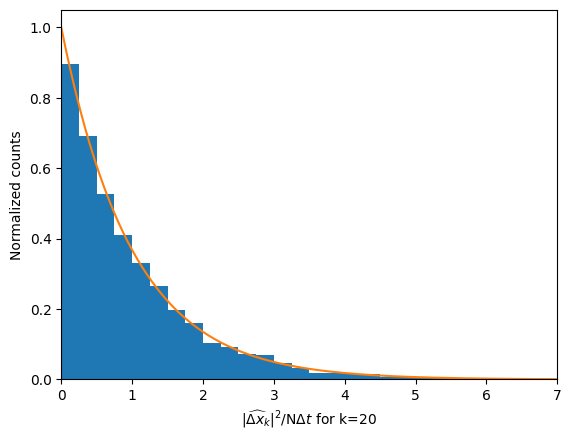

In [17]:
print(np.shape(Pxx),Pxx[:,0])
plt.hist(Pxx[:,20],bins = np.arange(0,10,step=0.25), density=True)
steps = np.linspace(0,10,150)
compare = [np.exp(-a) for a in steps]
#plt.hist(Pxx[:,10],bins = np.arange(0,10,step=0.25))
#plt.yscale('log')
plt.plot(steps,compare)
plt.xlim(0,7)
plt.ylabel('Normalized counts')
plt.xlabel('|$\widehat{\Delta x}_k$|$^2$/N$\Delta t$ for k=20')
plt.show()

6

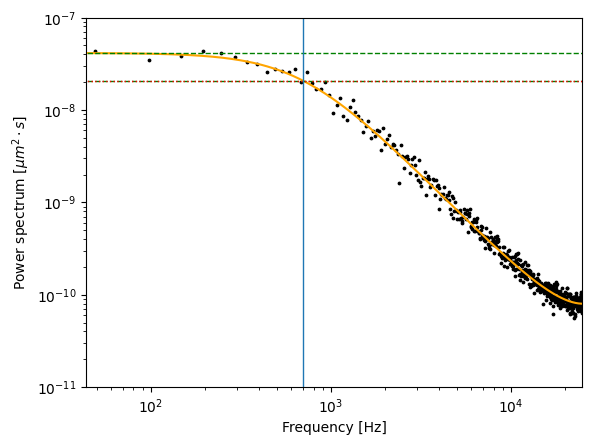

In [11]:
N = 2**10
fsample = 50000
Dt = 1/fsample
tmsr = N*Dt
M = 40
D = 0.4
fc = 700
c = np.exp(-2*np.pi*fc*Dt)
Dx = np.sqrt((1-c**2)*D/(2*np.pi*fc))
Df = 1/tmsr
x = np.zeros(shape=(M,N))
for j in range(1,N):
  x[:,j]=np.add(c*x[:,j-1],Dx*np.random.normal(size=(1,M)))
X = Dt*np.fft.fft(x)
PkEx = (np.absolute(X[:,1:int(N/2-1)])**2)/tmsr
meanPkEx = np.mean(PkEx,axis = 0)
xdata = np.arange(0,int(N/2-2))
ydata = meanPkEx[xdata]
f = (1+xdata)*Df

steps = np.linspace(0.1,N/2,5000)
xx = [s*fsample/N for s in steps]
def lam(k):
  l = 2*np.pi*fc*(1-2*c*np.cos(2*np.pi*k/N)+c**2)/(D*(1-c**2)*Dt)
  return l
expected = [1/lam(k) for k in steps]

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-11,1e-7)
plt.xlim((0.9+xdata[0])*Df,(1+xdata[int(N/2)-3])*Df)
plt.scatter(f,meanPkEx,s=3,color='black')
plt.plot(xx,expected,color='orange')
plt.plot([xx[0],xx[-1]],[1/lam(0),1/lam(0)],'g--',linewidth=1)
plt.plot([xx[0],xx[-1]],[0.5/lam(0),0.5/lam(0)],'g--',linewidth=1)
plt.plot([xx[0],xx[-1]],[1/lam(fc*Dt*N),1/lam(fc*Dt*N)],'r:',linewidth=1)
plt.vlines(fc,1e-11,1e-7,linewidth=1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power spectrum [$\mu m^2 \cdot s$]')
plt.show()

7 - monte carlo?

8 - ex.11.10

In [12]:
N = 2**10
fsample= 5e4
Dt = 1/fsample
tmsr = N*Dt
M = 40
D = 0.4
fc = 700
c = np.exp(-2*np.pi*fc*Dt)
Dx = np.sqrt((1-c**2)*D/(2*np.pi*fc))
Df = 1/tmsr
x = np.zeros(shape=(N*M,1))
for j in range(1,np.shape(x)[0]):
  x[j]=c*x[j-1]+Dx*np.random.normal()
print(x)

[[ 0.        ]
 [ 0.00090023]
 [-0.00194853]
 ...
 [ 0.01511466]
 [ 0.0126738 ]
 [ 0.01373952]]


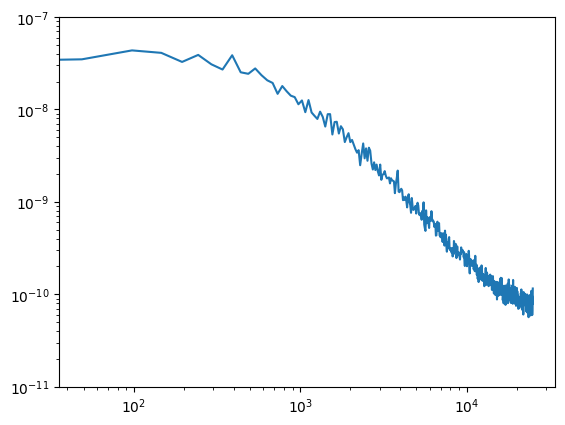

In [13]:
import scipy as sp
#print(np.shape(x[:,0]),np.shape(sp.signal.windows.boxcar(N)))
f, meanPkEx = sp.signal.welch(x[:,0],fs = fsample,window = sp.signal.windows.boxcar(N))
meanPkEx[1:int(N/2)]=meanPkEx[1:int(N/2)]/2
xdata = np.arange(0,N/2+1)
plt.plot(f,meanPkEx)
plt.yscale('log')
plt.xscale('log')
plt.ylim(10**(-11),10**(-7))
plt.show()

Blocking method for estimation of std dev

In [14]:
#copied from the first cell - particle in 1D trap:
D = 4/(6*np.pi)
fc=200
fsample = 50000
Dt = 1/fsample
c=np.exp(-2*np.pi*fc*Dt)
Dx=np.sqrt((1-c**2)*D/(2*np.pi*fc))
N = 2**20
stddev = np.sqrt(D/(2*np.pi*fc))
x = np.zeros(N)
for j in range(1,N):
  x[j]=c*x[j-1]+Dx*np.random.normal()
#blocking method
s = np.zeros(int(np.log2(N)-4))
s2 = np.zeros(int(np.log2(N)-4))
s[0]=np.std(x,ddof=1)/np.sqrt(N)
s2[0] = 1/np.sqrt(2*(N-1))*s[0]
m = np.mean(x)
xi = x
Np = N
for i in range(1,int(np.log2(N)-4)):
  xi = np.array([(xi[2*j]+xi[2*j+1])/2 for j in range(0,int(Np/2))])
  Np = Np/2
  s[i]=np.std(xi,ddof=1)/np.sqrt(Np)
  s2[i] = 1/np.sqrt(2*(Np-1))*s[i]
print(s)
x_ax = [N/(2**(i-1)) for i in range(1,int(np.log2(N)-3))]
#x_ax = np.arange(0,np.log2(N)-4)\

[1.27416278e-05 1.79083713e-05 2.50936920e-05 3.48993249e-05
 4.78079792e-05 6.36836338e-05 8.06923846e-05 9.49559718e-05
 1.03593098e-04 1.08125684e-04 1.10808019e-04 1.10611370e-04
 1.06481693e-04 1.06857005e-04 1.01745870e-04 1.10752196e-04]


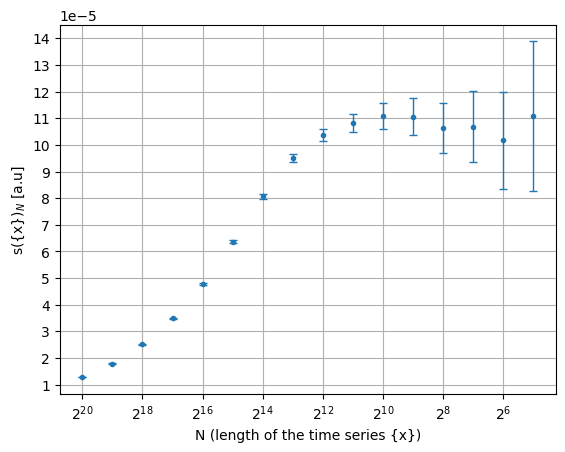

In [15]:
fig, ax = plt.subplots()
plt.errorbar(x_ax,s,yerr=2*s2, lw=1, fmt='.',capsize=3)
ax.invert_xaxis()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-5,-5))
ax.set_yticks(np.arange(1e-5, 15e-5, 1e-5))
plt.xscale('log',base=2)
plt.grid()
plt.xlabel('N (length of the time series {x})')
plt.ylabel('s({x})$_N$ [a.u]')
plt.savefig('blocking.png')


In [16]:
np.mean(x)

-0.00016539633982704197